<a href="https://colab.research.google.com/github/darkwingpatil/Ml_hackethons/blob/main/Hackethon_pytorch_MH1_CNN_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Problem Statement

To identify and classify images as cats or dogs

## Learning Objectives

At the end of the experiment, you will be able to :

* Load and prepare images for the model using Pytorch
* Develop a CNN model and improve model performance

In [ ]:
#@title Mini-hackathon walkthrough
from IPython.display import HTML

HTML("""<video width="854" height="480" controls>
  <source src="https://cdn.talentsprint.com/aiml/aiml_2020_b14_hyd/experiment_details_backup/Pytorch_CNN_cats_and_dogs.mp4" type="video/mp4">
</video>
""")

## Dataset

The Dogs and Cats dataset is a standard computer vision dataset that involves classifying photos as either containing a dog or cat. The train folder contains ~22k images of dogs and cats. Each image in this folder has the label as part of the filename. The test folder contains ~2k images, named according to a numeric id.

## Grading = 10 Marks

## Setup Steps

In [ ]:
#@title Run this cell to download the dataset

from IPython import get_ipython
ipython = get_ipython()

notebook="M2_Mini_Hackathon2_CNN_with_Pytorch" #name of the notebook
Answer = "This notebook is graded by mentors on the day of hackathon"
def setup():
#
   ipython.magic("sx wget http://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Cat_Dog_data_B17.zip")
   ipython.magic("sx unzip -qq Cat_Dog_data_B17.zip")
# ipython.magic("sx mv AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.bin?dl=1 AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.bin")
   print ("Setup completed successfully")
   return

setup()

Setup completed successfully


## Basic Pytorch packages

**torchvision:**  This package is used to load and prepare the dataset. Using this package we can perform/apply transformations on the input data.

**transforms:**  This package is  used to perform preprocessing on images and operations sequentially.

**nn:**  This package provides an easy and modular way to build and train simple or complex neural networks.

**optim:** This package is used for  implementing various optimization algorithms

In [ ]:
# Import Libraries
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch import nn
import torch.nn.functional as F
from torch import optim
from torch.autograd import Variable
from torch.utils.data import DataLoader

## **Stage 1:** Define Transformations and import data

### 1 Marks - > Compose multiple transformations with the following conditions

1. Transform image size to 128 by using Resize()

2. Convert image to Grayscale

3. Transform the image into a number using tensor

4. Normalize the tensor image with 0.5

[Hint](https://pytorch.org/vision/stable/transforms.html)

In [ ]:
image_size = (128,128)

transformations =  transforms.Compose([
    transforms.Resize(size=image_size),
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize(0.5,0.5)
])

### 1 Mark -> Load the dataset with the defined transformations

PyTorch includes a package called torchvision which is used to load and prepare the dataset. It includes two basic functions namely Dataset and DataLoader which helps in the transformation and loading of the dataset.

1. Dataset is used to read and transform a data point from the given dataset.  Note that, the data is not loaded on memory by now.

2. DataLoader is used to shuffle and batch the data. It can be used to load the data in parallel with multiprocessing workers. The Data loader reads the data and puts it into memory.



[Hint](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)

In [ ]:
batch_size = 100

train_set = datasets.ImageFolder('/content/Cat_Dog_data/train', transform = transformations)

# YOUR CODE HERE for the DataLoader
train_loader = DataLoader(train_set,shuffle=True,batch_size=batch_size)



In [ ]:
for img,label in train_loader:
  print(img.shape)
  break

torch.Size([100, 1, 128, 128])


### 1 Marks -> Plot the 5 images of Cats and 5 images of Dogs

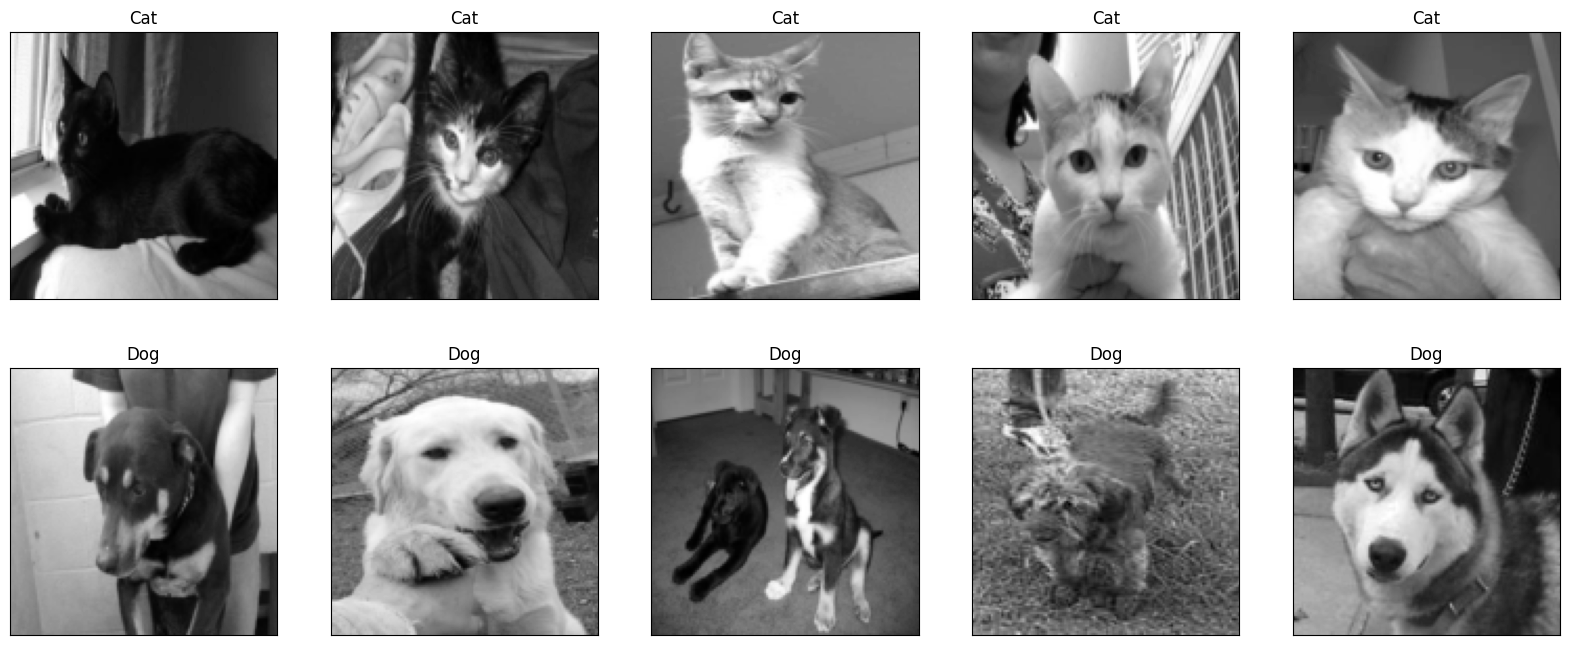

In [ ]:
import numpy as np


for batch in train_loader:
    inputs, labels = batch

    images = inputs.numpy()

    fig = plt.figure(figsize=(20, 8))
    label_name = {0: "Cat", 1: "Dog"}

    cat_indices = np.where(labels.numpy() == 0)[0][:5]
    dog_indices = np.where(labels.numpy() == 1)[0][:5]

    for i, idx in enumerate(np.concatenate([cat_indices, dog_indices])):
        ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(images[idx]), cmap='gray')
        ax.set_title(label_name[labels[idx].item()])

    plt.show()
    break

## **Stage2:** CNN Model

Neural Networks are inherited from the nn.Module class.

Define a neural network by using two functions \__init__ and forward function.

1. In the \__init__  function, perform a series of convolutions and pooling operations to detect the features. Apply a fully connected layer on top of these features. Apply LogSoftmax at the output layer to improve the performance.

2. The forward function is called on the Neural Network which takes the inputs and passes through the different layers that have been defined in the \__init__.  The output of both convolution and pooling layers is 3D whereas a fully connected layer expects a 1D vector of numbers. So flatten the output of the final pooling layer to a vector and that becomes the input to the fully connected layer.

[Hint](https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_convolutional_neuralnetwork/)



### 3 Marks -> Create CNN Model


In [ ]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Sample Convolution Layer 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2) # output size of the first convolutional layer is 16*128*128
        self.bn1 = nn.BatchNorm2d(16)
        self.relu1 = nn.ReLU()
        # Sample Maxpool for the Convolutional Layer 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=4, stride=4) # Maxpooling reduces the size by kernel size. After Maxpooling the output size is 16*32*32


        # YOUR CODE HERE for defining more number of Convolutional layers with Maxpool as required (Hint: Use at least 3 convolutional layers for better performance)

        self.fc1 = nn.Linear(16*32*32,256)

        self.fc2 = nn.Linear(256,128)

        self.fc3 = nn.Linear(128,64)

        self.fc4 = nn.Linear(64, 2)




        # YOUR CODE HERE for defining the Fully Connected Layer and also define LogSoftmax




    def forward(self, x):
        # Convolution Layer 1 and Maxpool
        out = self.cnn1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        out = self.maxpool1(out)

        # YOUR CODE HERE for the Convolutional Layers and Maxpool based on the defined Convolutional layers

        out = out.view(out.size(0), -1)


        out = F.relu(self.fc1(out))

        out = F.relu(self.fc2(out))

        out = F.relu(self.fc3(out))

        out = self.fc4(out)

        out = F.log_softmax(out, dim=1)

        return out

        # YOUR CODE HERE for flattening the output of the final pooling layer to a vector. Flattening is simply arranging the 3D volume of numbers into a 1D vector




        # YOUR CODE HERE for returning the output of LogSoftmax after applying Fully Connected Layer



### 1 Mark -> Create an instance of the model and Declare the loss function and optimizer


In [ ]:
# To run the training on GPU
print(torch.cuda.is_available())

device  =  torch.device("cuda" if torch.cuda.is_available() else "cpu")

True


In [ ]:
model = CNNModel()
model = model.to(device)
print(model)

criterion = nn.CrossEntropyLoss()

optimizer= optim.Adam(params=model.parameters(), lr=0.001)
#criterion = # YOUR CODE HERE : Explore and declare loss function

#optimizer = # YOUR CODE HERE : Explore on the optimizer and define with the learning rate


CNNModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=16384, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=2, bias=True)
)


In [ ]:
# !pip install torchsummary

from torchsummary import summary

summary(model, input_size=(1, 128, 128), batch_size=1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [1, 16, 128, 128]             416
       BatchNorm2d-2          [1, 16, 128, 128]              32
              ReLU-3          [1, 16, 128, 128]               0
         MaxPool2d-4            [1, 16, 32, 32]               0
            Linear-5                   [1, 256]       4,194,560
            Linear-6                   [1, 128]          32,896
            Linear-7                    [1, 64]           8,256
            Linear-8                     [1, 2]             130
Total params: 4,236,290
Trainable params: 4,236,290
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.06
Forward/backward pass size (MB): 6.13
Params size (MB): 16.16
Estimated Total Size (MB): 22.35
----------------------------------------------------------------


## **Stage 3:** Train the Model and validate it continuously to calculate the loss and accuracy for the train dataset across each epoch.

### Expected training accuracy is above 90%

### 2 Marks -> Iterate over images in the train_loader and perform the following steps.

1. First, we zero out the gradients using zero_grad()

2. We pass the data to the model. Convert the data to GPU before passing data  to the model

3. We calculate the loss using a Loss function

4. Perform Backward pass using backward() to update the weights

5. Optimize and predict by using the torch.max()

6. Calculate the accuracy of the train dataset

[Hint](https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_convolutional_neuralnetwork/)

In [ ]:
# YOUR CODE HERE. This will take time

# Record loss and accuracy of the train dataset

# No of Epochs
epoch = 20

# keeping the network in train mode
model.train()
train_losses,  train_accuracy = [], []

# Loop for no of epochs
for e in range(epoch):
    train_loss = 0
    correct = 0
    # Iterate through all the batches in each epoch
    for images, labels in train_loader:

      # Convert the image and label to gpu for faster execution
      images = images.to(device)
      labels = labels.to(device)

      # Zero the parameter gradients
      optimizer.zero_grad()

      # Passing the data to the model (Forward Pass)
      outputs = model(images)

      # Calculating the loss
      loss = criterion(outputs, labels)
      train_loss += loss.item()

      # Performing backward pass (Backpropagation)
      loss.backward()

      # optimizer.step() updates the weights accordingly
      optimizer.step()

      _, predicted = torch.max(outputs, 1)
      correct += (predicted == labels).sum().item()

    # Accuracy calculation
    train_losses.append(train_loss/len(train_set))
    train_accuracy.append(100 * correct/len(train_set))
    print('epoch: {}, Train Loss:{:.6f} Train Accuracy: {:.2f} '.format(e+1,train_losses[-1], train_accuracy[-1]))


epoch: 1, Train Loss:0.006283 Train Accuracy: 65.16 
epoch: 2, Train Loss:0.005449 Train Accuracy: 72.43 
epoch: 3, Train Loss:0.004960 Train Accuracy: 75.95 
epoch: 4, Train Loss:0.004591 Train Accuracy: 78.30 
epoch: 5, Train Loss:0.004197 Train Accuracy: 80.41 
epoch: 6, Train Loss:0.003804 Train Accuracy: 82.81 
epoch: 7, Train Loss:0.003427 Train Accuracy: 84.82 
epoch: 8, Train Loss:0.003028 Train Accuracy: 86.84 
epoch: 9, Train Loss:0.002573 Train Accuracy: 88.98 
epoch: 10, Train Loss:0.002077 Train Accuracy: 91.34 
epoch: 11, Train Loss:0.001811 Train Accuracy: 92.47 
epoch: 12, Train Loss:0.001361 Train Accuracy: 94.59 
epoch: 13, Train Loss:0.001051 Train Accuracy: 95.87 
epoch: 14, Train Loss:0.000868 Train Accuracy: 96.80 
epoch: 15, Train Loss:0.000704 Train Accuracy: 97.29 
epoch: 16, Train Loss:0.000652 Train Accuracy: 97.55 
epoch: 17, Train Loss:0.000485 Train Accuracy: 98.31 
epoch: 18, Train Loss:0.000570 Train Accuracy: 98.06 
epoch: 19, Train Loss:0.000298 Train 

## **Stage 4:** Testing Evaluation for CNN model

### Expected performance of test evaluation is above 90%

### 1 Marks -> Evaluate model with the given test data

1. Transform and load the test images.

2. Pass the test data through the model (network) to get the outputs

3. Get the predictions from a maximum value using torch.max

4. Compare with the actual labels and get the count of the correct labels

5. Calculate the accuracy based on the count of correct labels

In [ ]:
val_set = datasets.ImageFolder('/content/Cat_Dog_data/test',transform = transformations)

# YOUR CODE HERE for the DataLoader

test_loader = DataLoader(val_set,shuffle=True,batch_size=100)

In [ ]:
# Keeping the network in evaluation mode
model.eval()

Test_accuracy = 0

# Iterate through all the batches in each epoch
for images,labels in test_loader:

    # Convert the images and labels to gpu for faster execution
    images = images.to(device)
    labels = labels.to(device)

    # Do the forward pass
    outputs = model(images)

    # Accuracy calculation
    _, predicted = torch.max(outputs, 1)
    Test_accuracy += (predicted == labels).sum().item()

Accuracy = 100 * Test_accuracy / len(val_set)
print("Accuracy of Test Data is", Accuracy)


Accuracy of Test Data is 75.84352078239608
